# 비전공자를 위한 AI 딥러닝(Deep Learning)


#  패션 MNIST
### 지금은 그냥 GPT의 도움을 많이 받는게 맞는 것 같아, 혼자서 뭐 해보려면 스트레스도 너무 많이 받고 계속 작은 실수 때문에 시간 많이 잡아먹는다. 즐겁게 하자

## 1. 우선 무슨 데이터가 있는지 확인하자!

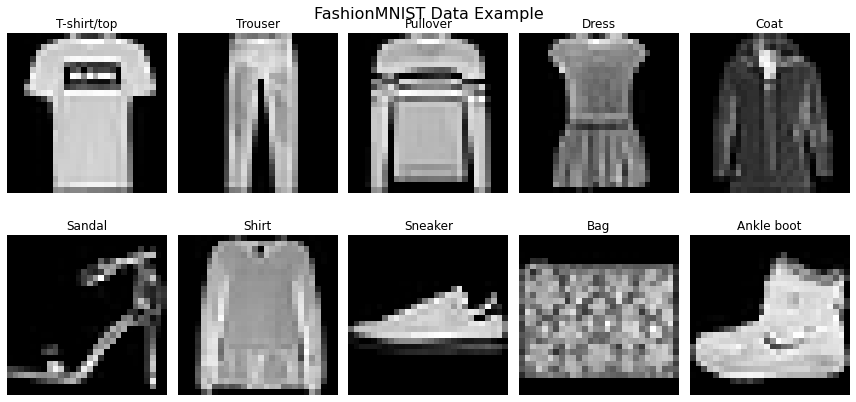

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

# FashionMNIST 데이터셋 불러오기
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())

# FashionMNIST 데이터셋의 클래스
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 각 라벨별로 하나씩 이미지 출력하기
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('FashionMNIST Data Example', fontsize=16)

label_count = [0] * 10  # 각 라벨의 이미지 카운트를 위한 리스트 초기화

for data in train_dataset:
    image, label = data
    if label_count[label] == 0: # labe_count를 이용해서 아직 활용되지 않은 데이터 셋만 본다.
        ax = axs[label // 5, label % 5] # 여기에서 가장 애먹었다 axs의 개념이 잡혀있지 않아서 사실 지금도 안 잡혀있는데 
        #간단하게 설명하세 label 벨류값을 이용해서 자동으로 어디에 넣을지 결정함 axs가 뭔지 추상적으로나마 아니까 이해가 가네
        ax.imshow(image.squeeze().numpy(), cmap='gray')
        ax.set_title(classes[label])
        ax.axis('off')
        label_count[label] += 1
    
    if all(count > 0 for count in label_count):
        break

plt.tight_layout()
plt.show()

 실험용 데이터들

In [2]:
 print(train_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [3]:
image, label = train_dataset[0]
print(f"이미지 shape: {image.shape}")
print(f"라벨: {label} - {classes[label]}")

이미지 shape: torch.Size([1, 28, 28])
라벨: 9 - Ankle boot


In [4]:
first_data = train_dataset[0]
print(first_data)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

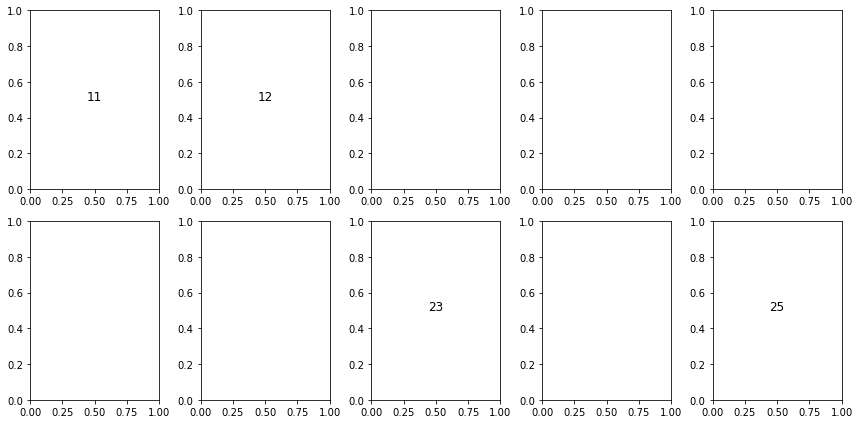

Figure(864x432)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002088BD80700>


In [5]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# Plotting the numbers as specified
axs[0, 0].text(0.5, 0.5, '11', fontsize=12, ha='center')
axs[0, 1].text(0.5, 0.5, '12', fontsize=12, ha='center')
axs[1, 2].text(0.5, 0.5, '23', fontsize=12, ha='center')
axs[1, 4].text(0.5, 0.5, '25', fontsize=12, ha='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
print(fig)
print(axs)

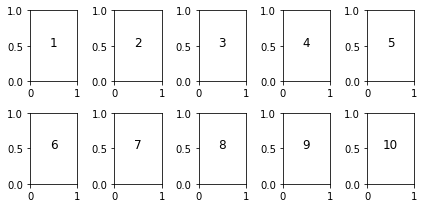

Figure(432x216)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002088BD40DC0>


In [6]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axs = plt.subplots(2, 5, figsize=(6, 3))

# Fill subplots with numbers according to the specified pattern
for i in range(2):
    for j in range(5):
        num = i * 5 + j + 1  # Calculate the number based on row and column
        axs[i, j].text(0.5, 0.5, f'{num}', fontsize=12, ha='center')  # Place the number in the center

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
print(fig)
print(axs)

#axs는 서브플롯의 배열을 나타낸다. 

In [7]:
first_data = train_dataset[0]
print(first_data)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [8]:
first_data = train_dataset[5][1]
print(first_data)
#N번째 데이터의 두번째요소(여기서는 라벨)

2


In [9]:
first_data = train_dataset[2][0].shape
print(first_data)
#N번째 데이터의 두번째요소(여기서는 라벨)

torch.Size([1, 28, 28])


In [10]:
num_features = image.numel()
print("특성 수:", num_features)

특성 수: 784


## 2.다층퍼셉트론을 활용한 데이터 분류

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# 데이터셋 불러오기
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]) # 정규과정이라는데 텐서로 바꾼다. 이미지 데이터를 정규화한다. (민감성,분포 조정) 이라는데 솔직히 나는 아직 잘 모르겠다.

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
#데이터셋을 로드하고 전처리가 주요

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
#이 클래스는 학습을 위해서 베치를 나누고 셔플하고 하는게 핵심 num works는 솔직히 뭔지 모르겠다.

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# 클래스 나누어주기
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


In [12]:
#다층 퍼셉트론 생성
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#클래스를 활용한 객체 및 손실함수 옵티마이저 생성
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# 학습
for epoch in range(5):  #  에폭횟수 

    running_loss = 0.0  #미니배치의 손실을 누적
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #★미니배치 쓰는 이 부분이 조금 생소해서 어렵네..
        running_loss += loss.item() #.item은 분명 저번에도 썼는데 왜 헷갈리냐
        if i % 2000 == 1999:    # 2000 미니배치마다 출력합니다.
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
#사실 직접 구현 안하고 가져다 쓰는 이 부분이 제일 쉽긴하다.

[1,  2000] loss: 0.830
[1,  4000] loss: 0.550
[1,  6000] loss: 0.509
[1,  8000] loss: 0.473
[1, 10000] loss: 0.452
[1, 12000] loss: 0.413
[1, 14000] loss: 0.420
[2,  2000] loss: 0.398
[2,  4000] loss: 0.384
[2,  6000] loss: 0.386
[2,  8000] loss: 0.382
[2, 10000] loss: 0.374
[2, 12000] loss: 0.374
[2, 14000] loss: 0.352
[3,  2000] loss: 0.355
[3,  4000] loss: 0.338
[3,  6000] loss: 0.332
[3,  8000] loss: 0.324
[3, 10000] loss: 0.347
[3, 12000] loss: 0.332
[3, 14000] loss: 0.345
[4,  2000] loss: 0.319
[4,  4000] loss: 0.319
[4,  6000] loss: 0.310
[4,  8000] loss: 0.313
[4, 10000] loss: 0.309
[4, 12000] loss: 0.315
[4, 14000] loss: 0.305


In [ ]:
correct = 0
total = 0
misclassified_images = {0: None, 1: None, 2: None, 3: None, 4: None, 
                        5: None, 6: None, 7: None, 8: None, 9: None}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  #_, 표현만 제외하면 어려운건 없음 여기까지는
        total += labels.size(0) #현재 미니배치에 사용된 이미지 수라는데 약간 어려웠다. 
        correct += (predicted == labels).sum().item()

        # 오분류된 예측 찾기 (이 부분이 항상 어려운 이유는 내가 직접 만든게 아니라 torch를 이용해서 만들어진 데이터를 다루어서 그런)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                label = labels[i].item()
                if misclassified_images[label] is None:
                    misclassified_images[label] = {
                        'image': images[i],
                        'predicted': predicted[i].item(),
                        'actual': label
                    }

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# 각 클래스별로 대표적인 오분류 하나씩 출력
for label, misclassified in misclassified_images.items():
    if misclassified is not None:
        image = misclassified['image']
        predicted = misclassified['predicted']
        actual = misclassified['actual']
        print('오분류:', classes[predicted], '실제:', classes[actual])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 테스트 데이터셋에서 오분류된 이미지 출력
num_classes = 10
fig, axs = plt.subplots(num_classes, figsize=(10, 20))

for label in range(num_classes):
    if misclassified_images[label] is not None:
        misclassified = misclassified_images[label]
        image = misclassified['image']
        predicted = misclassified['predicted']
        actual = misclassified['actual']

        # 이미지를 numpy 배열로 변환
        image_np = image.numpy()

        # 이미지 시각화
        axs[label].imshow(np.squeeze(image_np), cmap='gray')
        axs[label].set_title(f'Predicted: {classes[predicted]} \n Actual: {classes[actual]}')
        axs[label].axis('off')

plt.tight_layout()
plt.show()

총평:
전체적으로 실패
그냥 내 힘으로 어떻게 보려고 했는데 너무 힘들더라,
아직은 GPT의 힘을 빌려야 하는듯...

내가 늘 말하지만 처음부터 너무 도전적으로 하지말자,
내 수준에 맞게 쉬운것부터 차근차근 그러면 언젠가는 잘하게 될 날이 오겠지
